# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data and Basic Summary

### Data Loading and Validation Data Split
There is a class called "TrafficDataRealFileProviderAutoSplitValidationData" will load data from **"train.p"** and **"test.p"**, also parameters will help us split validation data from train.p
> below code will load from file and split trainging / validation set as 80/20
```python
from traffic.traffic_test_data_provider import TrafficDataRealFileProviderAutoSplitValidationData
original_data_provider = TrafficDataRealFileProviderAutoSplitValidationData(
            split_validation_from_train=True, validation_size=0.20)
```
> below code will load file from the file name you specific
```python
data_provider = TrafficDataRealFileProviderAutoSplitValidationData(
    training_file="your_train_file.p", testing_file="your_test_file.p",
    split_validation_from_train=True, validation_size=0.20)
```

### Data Augment and Preprocessing
Data process procedures are listed in [python file: traffic_data_enhance](../edit/traffic/traffic_data_enhance.py)

first all, it is clearly show that data had a class imbalance.
>highest count of sign names: 'Speed limit (50km/h)' **1800**

>lowest count of sign names: 'Go straight or left', **163**

>that's about **1100%** difference

#### The augment procedure I have
1. Random Rotation between -20 and 20 angles
2. Random Corp Image between 20% and 0.5%
3. Random Brightness and Contrast
After read from 'train.p' file, I will shuffle and split it into 80/20, where 80% used for training, 20% used for validation.
The augment process will only created based on training data set, never touch valiation set.

I found out that even by augment training data with 200% of max class(1800) with method 1 or 2, still dosen't help too much

However, my [Wrong Predictions Picture](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/raw/master/images/wrong_predictions.png "Wrong Predictions") picture makes me think that the model dosen't work well when picture is too dark or too bright, I think brightness and Contrast will help me.

Brightness and Contrast required lost of computing power, I implemented the code but haven't produce the data yet. will update this later.

### Data Normalisation
Data process procedures are listed in [python file: traffic_data_enhance](../edit/traffic/traffic_data_enhance.py)

Data normalisation helps with training optimisation

I have expirement below normalisation methods
1. No normalisation
2. [0..255] convert to [0..1]
3. [0..255] convert to [-1..1]
4. grayscale
5. tf.image.per_image_standardization (whitening)

No normalisation still gives a good score, but it make the training harder (took longer), as a example,

For LeNet(Basic) network, 
With normalisation 
>EPOCH 50 training loss = 0.015 accuracy = 0.996 Validation loss = 0.083 accuracy = 0.990

Without 
>EPOCH 50 training loss = 0.042 accuracy = 0.989 Validation loss = 0.116 accuracy = 0.983

### Methods and Scores

[LeNet(Basic) Structure in Source Code](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/blob/master/traffic/lenet.py) 
1. Input 32x32x3(or 1 if grayscale)
2. Filter 5x5x6 output 28x28x6
3. max pool (ksize=[2, 2], strides=[2, 2]) output 14x14x6
4. Filter 5x5x16 output 10x10x16
5. max pool (ksize=[2, 2], strides=[2, 2]) output 5x5x16
6. drop out
7. full connected layer 400 -> 120 -> 84 -> 43

[LeNet(Adv) Structure in Source Code](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/blob/master/traffic/traffic_lenet_v8_108x200.py) 
1. Input 32x32x3(or 1 if grayscale)
2. Filter 5x5x108 output 28x28x108
3. max pool (ksize=[2, 2], strides=[2, 2]) output 14x14x108
4. Filter 5x5x200 output 10x10x200
5. max pool (ksize=[2, 2], strides=[2, 2]) output 5x5x200
6. drop out
7. full connected layer 5000 -> 1000 -> 200 -> 43

[Inception Structure in Source Code](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/blob/master/traffic/traffic_net_inception.py)

[Model Comparison Note Book Located Here](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/blob/master/Traffic_Sign_Classifier_Model_Comparision.ipynb)

| Score | Network     |Augment| Normalisation  |Learning Rate|Drop Out|Epoch|
| ------|-------------|-------|----------------|-------------|--------|-----|
| 0.900 | LeNet(Basic)|None   |None            |0.001        |None    |80   |
| 0.926 | LeNet(Basic)|None   |None            |0.001        |0.5     |80   |
| 0.938 | LeNet(Basic)|None   |standardization |0.001        |None    |80   |
| 0.956 | LeNet(Basic)|None   |standardization |0.001        |0.5     |80   |
| 0.951 | LeNet(Basic)|Rotate |standardization |0.001        |0.5     |80   |
| 0.958 | LeNet(Adv)  |None   |standardization |0.001        |0.3     |100  |
| 0.954 | Inception   |None   |standardization |0.0005       |0.3     |80   |

In [2]:
from traffic.traffic_test_data_provider import TrafficDataRealFileProviderAutoSplitValidationData
from traffic.traffic_lenet import Lenet
from traffic.traffic_data import TrafficDataSets
from traffic.data_explorer import SignNames
from traffic.data_explorer import DataExplorer
from traffic.traffic_data_enhance import *
from IPython.display import Image
from traffic.traffic_lenet_v2 import LenetV2
from traffic.traffic_lenet_v3 import LenetV3
from traffic.traffic_lenet_v4 import LenetV4
from traffic.traffic_lenet_v5 import LenetV5
from traffic.traffic_net_inception import NetInception

%matplotlib inline

print("tensorflow", tf.__version__)

sign_names = SignNames("signnames.csv")
original_data_provider = TrafficDataRealFileProviderAutoSplitValidationData(
            split_validation_from_train=True, validation_size=0.20)
original_data_explorer = DataExplorer.from_data_provider(sign_names, original_data_provider)

print("orignal data loaded")
print("Original Data Summary")
print(original_data_explorer.summary())

tensorflow 0.12.1
orignal data loaded
Original Data Summary

        training data set: 
            examples:31367
            shape:(31367, 32, 32, 3)
        
        validation data set: 
            examples:7842
            shape:(7842, 32, 32, 3)
        
        testing data set: 
            examples:12630
            shape:(12630, 32, 32, 3)
        
        unique classes: 43
        


In [2]:

def augment_data_random_rotate(ratio, provider=original_data_provider):
    images, labels = enhance_with_random_rotate(provider.X_train, provider.y_train, ratio)
    provider = provider.to_other_provider(X_train_overwrite=images, y_train_overwrite=labels)
    return provider

rotated_data_provider = augment_data_random_rotate(1)
rotated_data_explorer = DataExplorer.from_data_provider(sign_names, rotated_data_provider)

print("random roated data loaded")
print("Augmented Data Summary - Random Rotate")
print(rotated_data_explorer.summary())

generating class:0 with ratio:10, max input:1800, current:172
generating class:1 with ratio:1, max input:1800, current:1724
generating class:2 with ratio:0, max input:1800, current:1800
generating class:3 with ratio:1, max input:1800, current:1130
generating class:4 with ratio:1, max input:1800, current:1562
generating class:5 with ratio:1, max input:1800, current:1496
generating class:6 with ratio:4, max input:1800, current:361
generating class:7 with ratio:1, max input:1800, current:1162
generating class:8 with ratio:1, max input:1800, current:1109
generating class:9 with ratio:1, max input:1800, current:1202
generating class:10 with ratio:1, max input:1800, current:1640
generating class:11 with ratio:1, max input:1800, current:1084
generating class:12 with ratio:1, max input:1800, current:1650
generating class:13 with ratio:1, max input:1800, current:1708
generating class:14 with ratio:2, max input:1800, current:618
generating class:15 with ratio:3, max input:1800, current:510
gener

---

## Step 1: Dataset Summary & Exploration


In [3]:
def data_distribution(explorer):
    distribution = explorer.training_data_distribution()
    highest = explorer.highest_sign_names_count(distribution)
    distribution = explorer.training_data_distribution()
    lowest = explorer.lowest_sign_names_count(distribution)
    print("highest count of sign names:", highest)
    print("lowest count of sign names:", lowest)
    
    explorer.bar_chart_data_distribution(explorer.training_data_distribution(),
                                         "Training Data Distribution").show()
    explorer.bar_chart_data_distribution(explorer.validation_data_distribution(),
                                         "Validation Data Distribution").show()
    explorer.bar_chart_data_distribution(explorer.testing_data_distribution(),
                                         "Testing Data Distribution").show()



### Original Dataset Distribution


highest count of sign names: ('Speed limit (50km/h)', 1800)
lowest count of sign names: ('Go straight or left', 163)


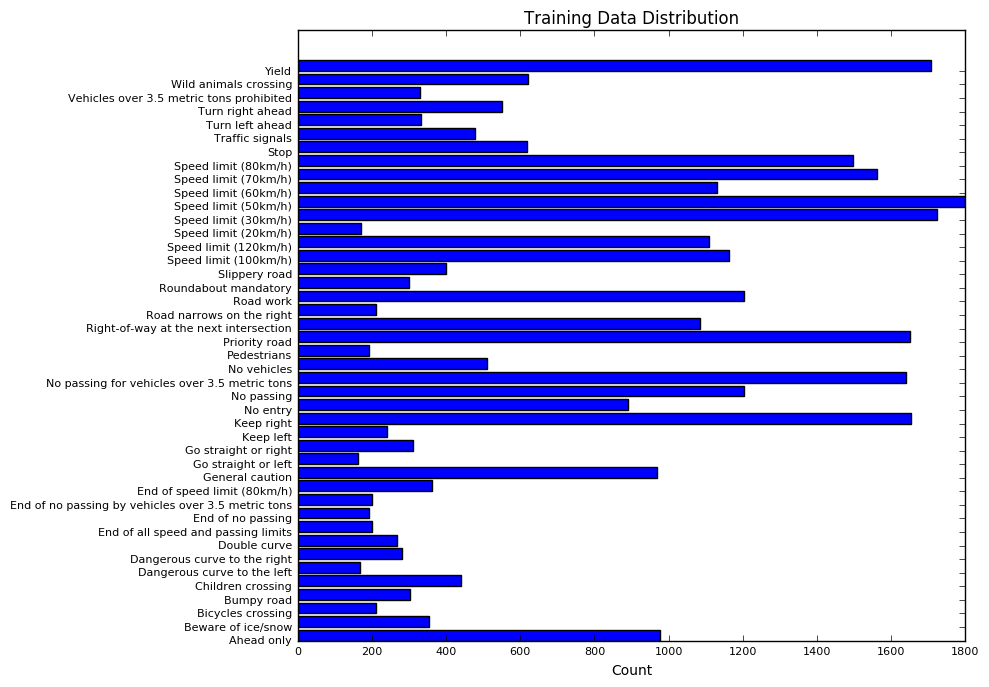

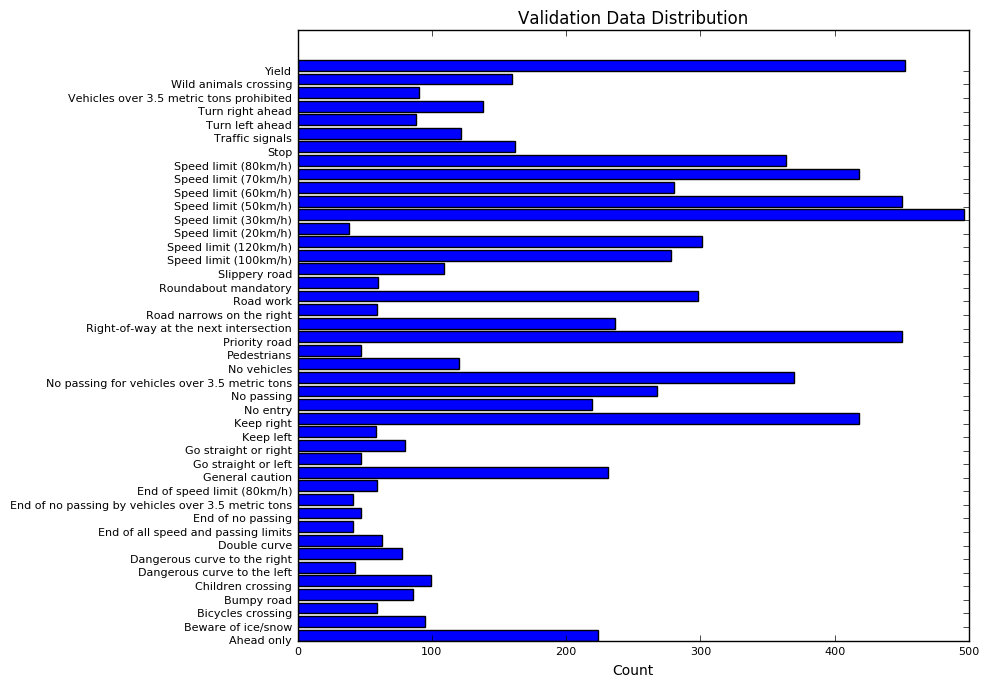

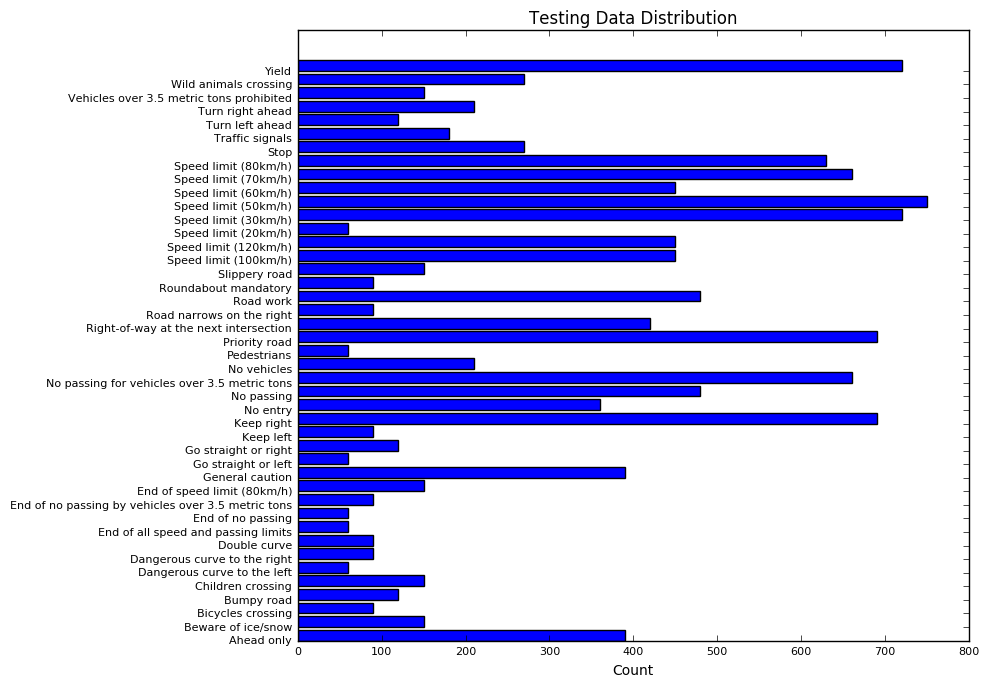

In [6]:
data_distribution(original_data_explorer)

### Random Rotated Dataset Distribution


highest count of sign names: ('No entry', 2673)
lowest count of sign names: ('General caution', 969)


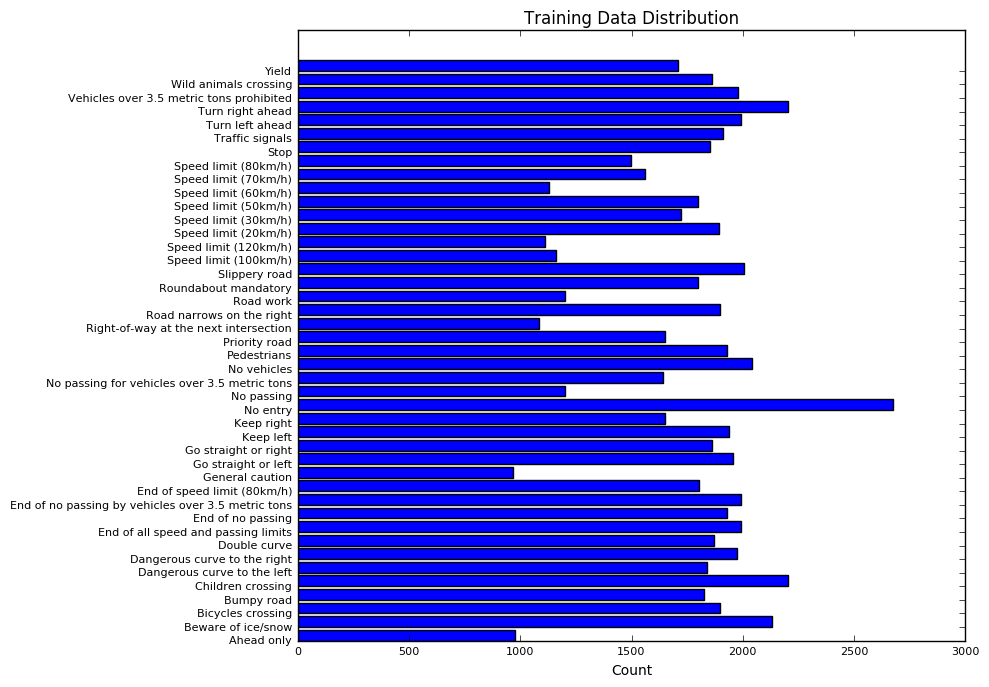

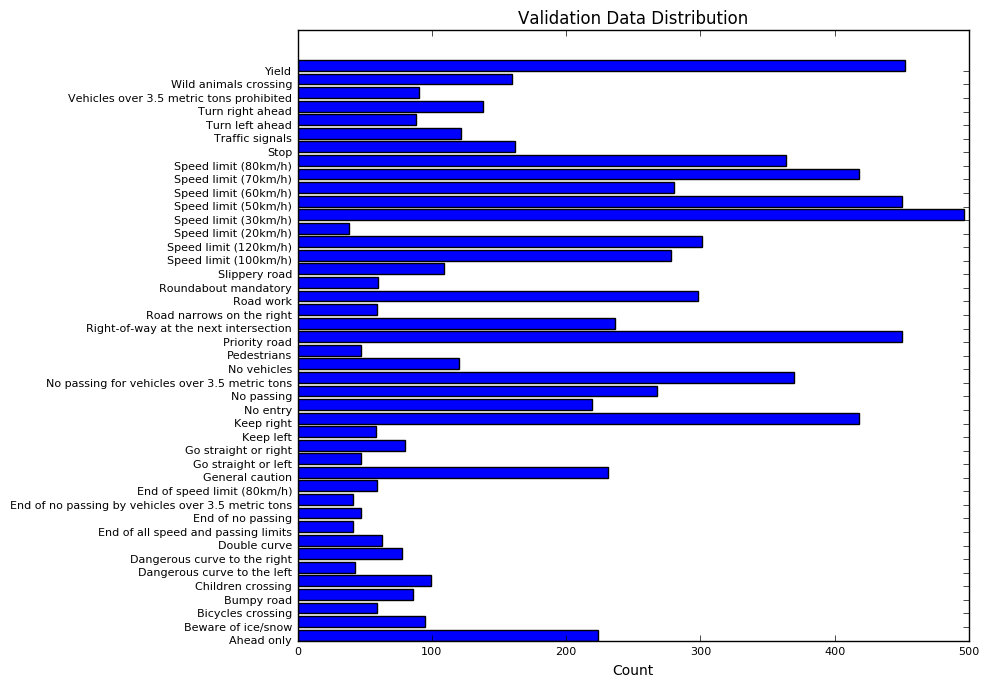

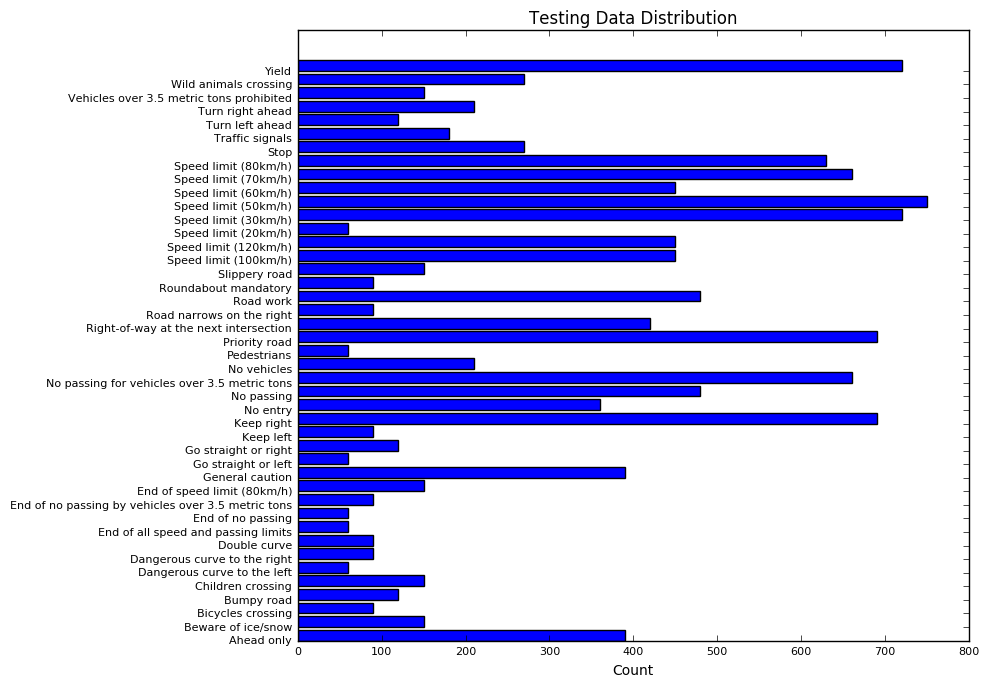

In [7]:
data_distribution(rotated_data_explorer)

### Sample Images

with DataExplorer class, you can sample all data with a slice

training data set samples


showing image : 100%|██████████| 10/10 [00:00<00:00, 940.03it/s]


<function matplotlib.pyplot.show>

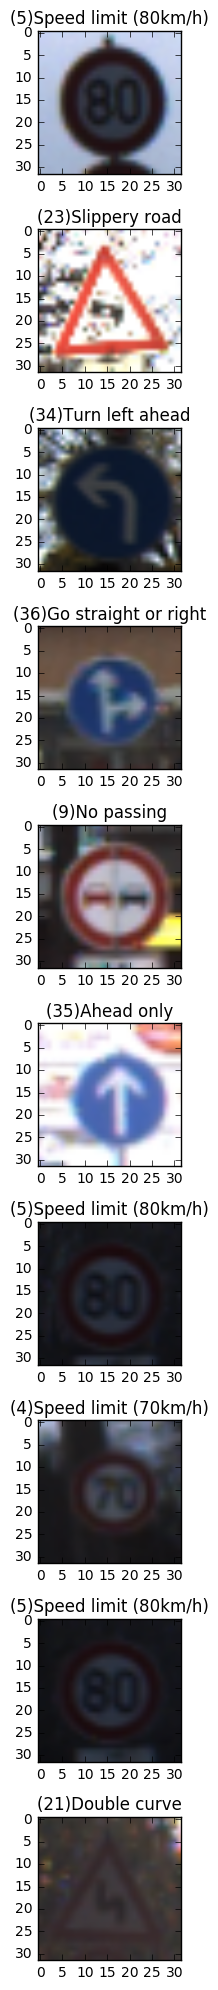

In [8]:
print("training data set samples")
original_data_explorer.sample_training_data(slice(200, 210)).show
        

validation data set samples


showing image : 100%|██████████| 10/10 [00:00<00:00, 1128.53it/s]


<function matplotlib.pyplot.show>

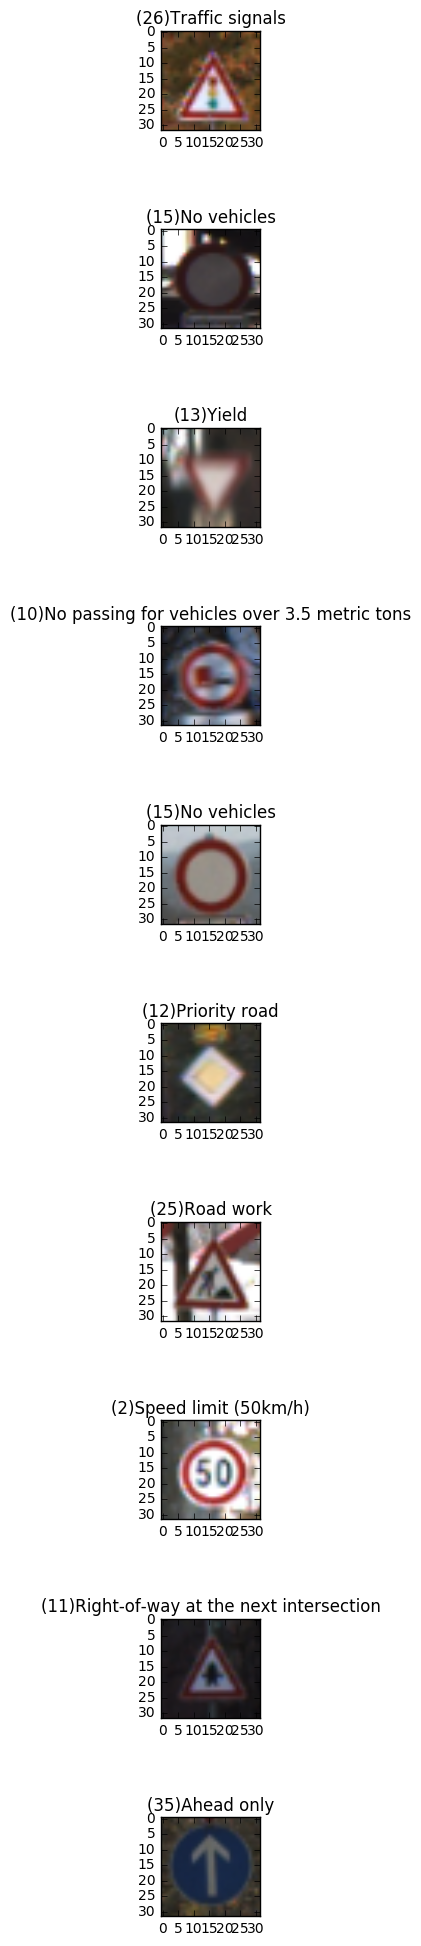

In [10]:
print("validation data set samples")
original_data_explorer.sample_validation_data(slice(0, 10)).show
        

testing data set samples


showing image : 100%|██████████| 10/10 [00:00<00:00, 627.59it/s]


<function matplotlib.pyplot.show>

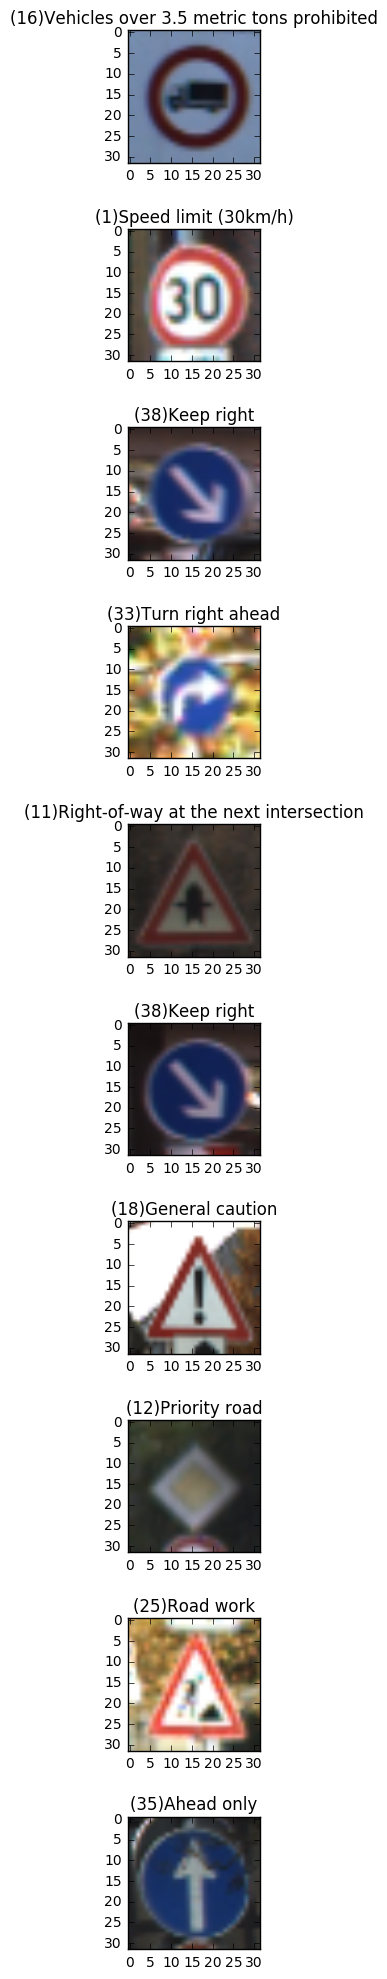

In [11]:
print("testing data set samples")
original_data_explorer.sample_testing_data(slice(0, 10)).show
        

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Answered in Step 0 of this notebook

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Answered in Step 0 of this notebook

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

2017-01-08 15:12:03,117 - training data 31367
2017-01-08 15:12:06,604 - EPOCH 1 training loss = 1.858 accuracy = 0.483 Validation loss = 0.550 accuracy = 0.849
2017-01-08 15:12:09,956 - EPOCH 2 training loss = 0.622 accuracy = 0.809 Validation loss = 0.258 accuracy = 0.931
2017-01-08 15:12:13,009 - EPOCH 3 training loss = 0.376 accuracy = 0.886 Validation loss = 0.176 accuracy = 0.950
2017-01-08 15:12:16,177 - EPOCH 4 training loss = 0.272 accuracy = 0.916 Validation loss = 0.138 accuracy = 0.965
2017-01-08 15:12:19,312 - EPOCH 5 training loss = 0.211 accuracy = 0.935 Validation loss = 0.103 accuracy = 0.974
2017-01-08 15:12:22,618 - EPOCH 6 training loss = 0.169 accuracy = 0.947 Validation loss = 0.097 accuracy = 0.973
2017-01-08 15:12:25,895 - EPOCH 7 training loss = 0.143 accuracy = 0.956 Validation loss = 0.080 accuracy = 0.980
2017-01-08 15:12:29,175 - EPOCH 8 training loss = 0.115 accuracy = 0.964 Validation loss = 0.077 accuracy = 0.982
2017-01-08 15:12:32,328 - EPOCH 9 training

TypeError: Cannot handle this data type

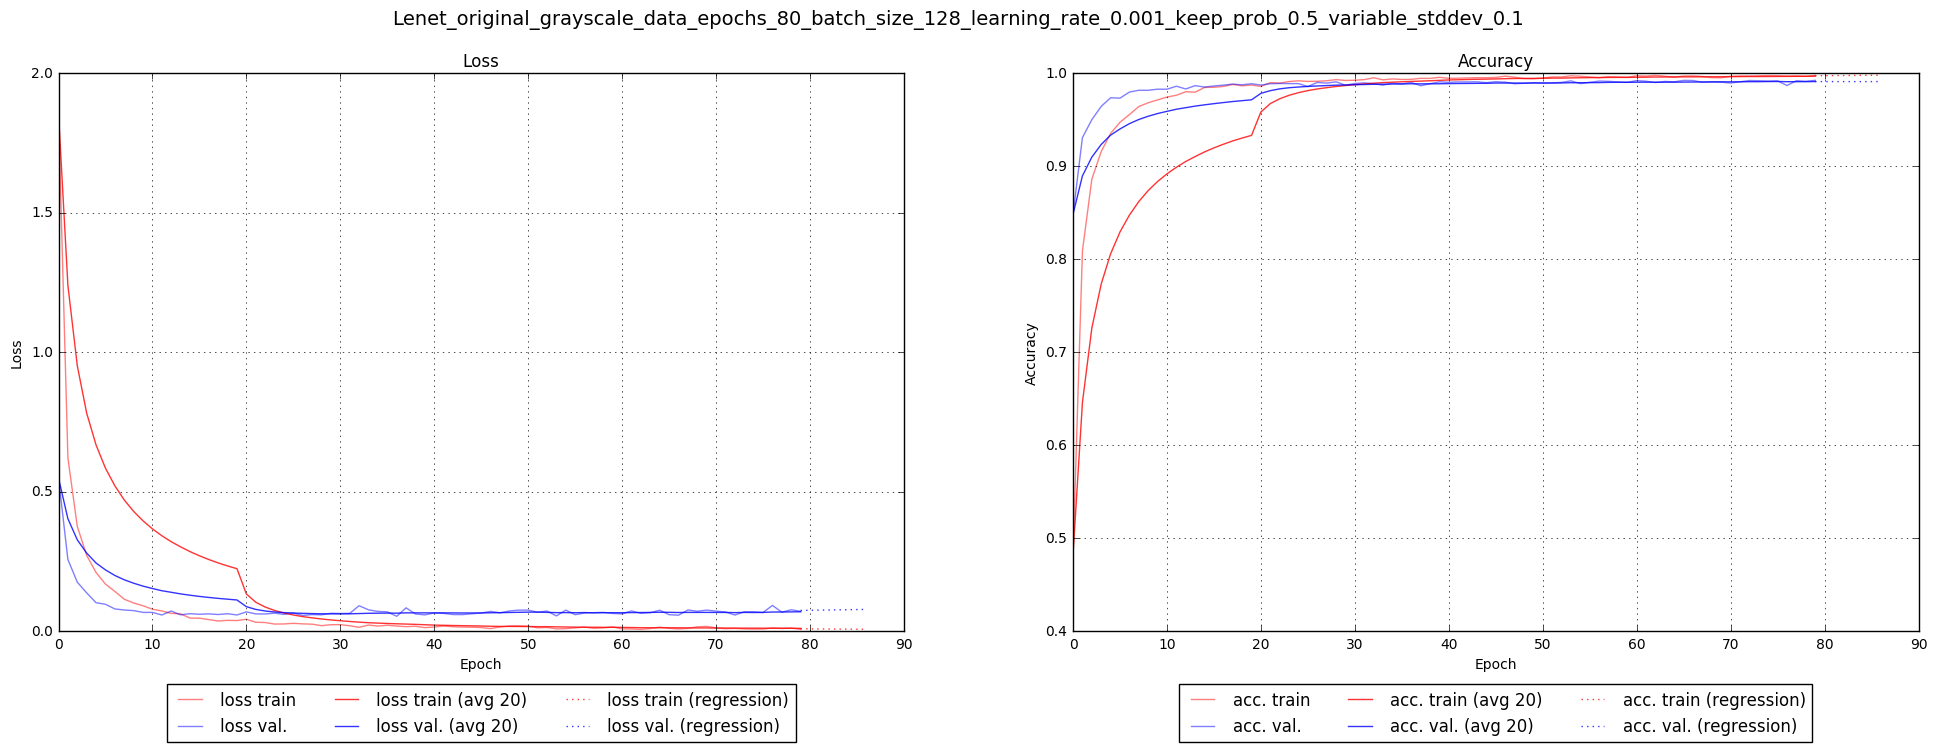

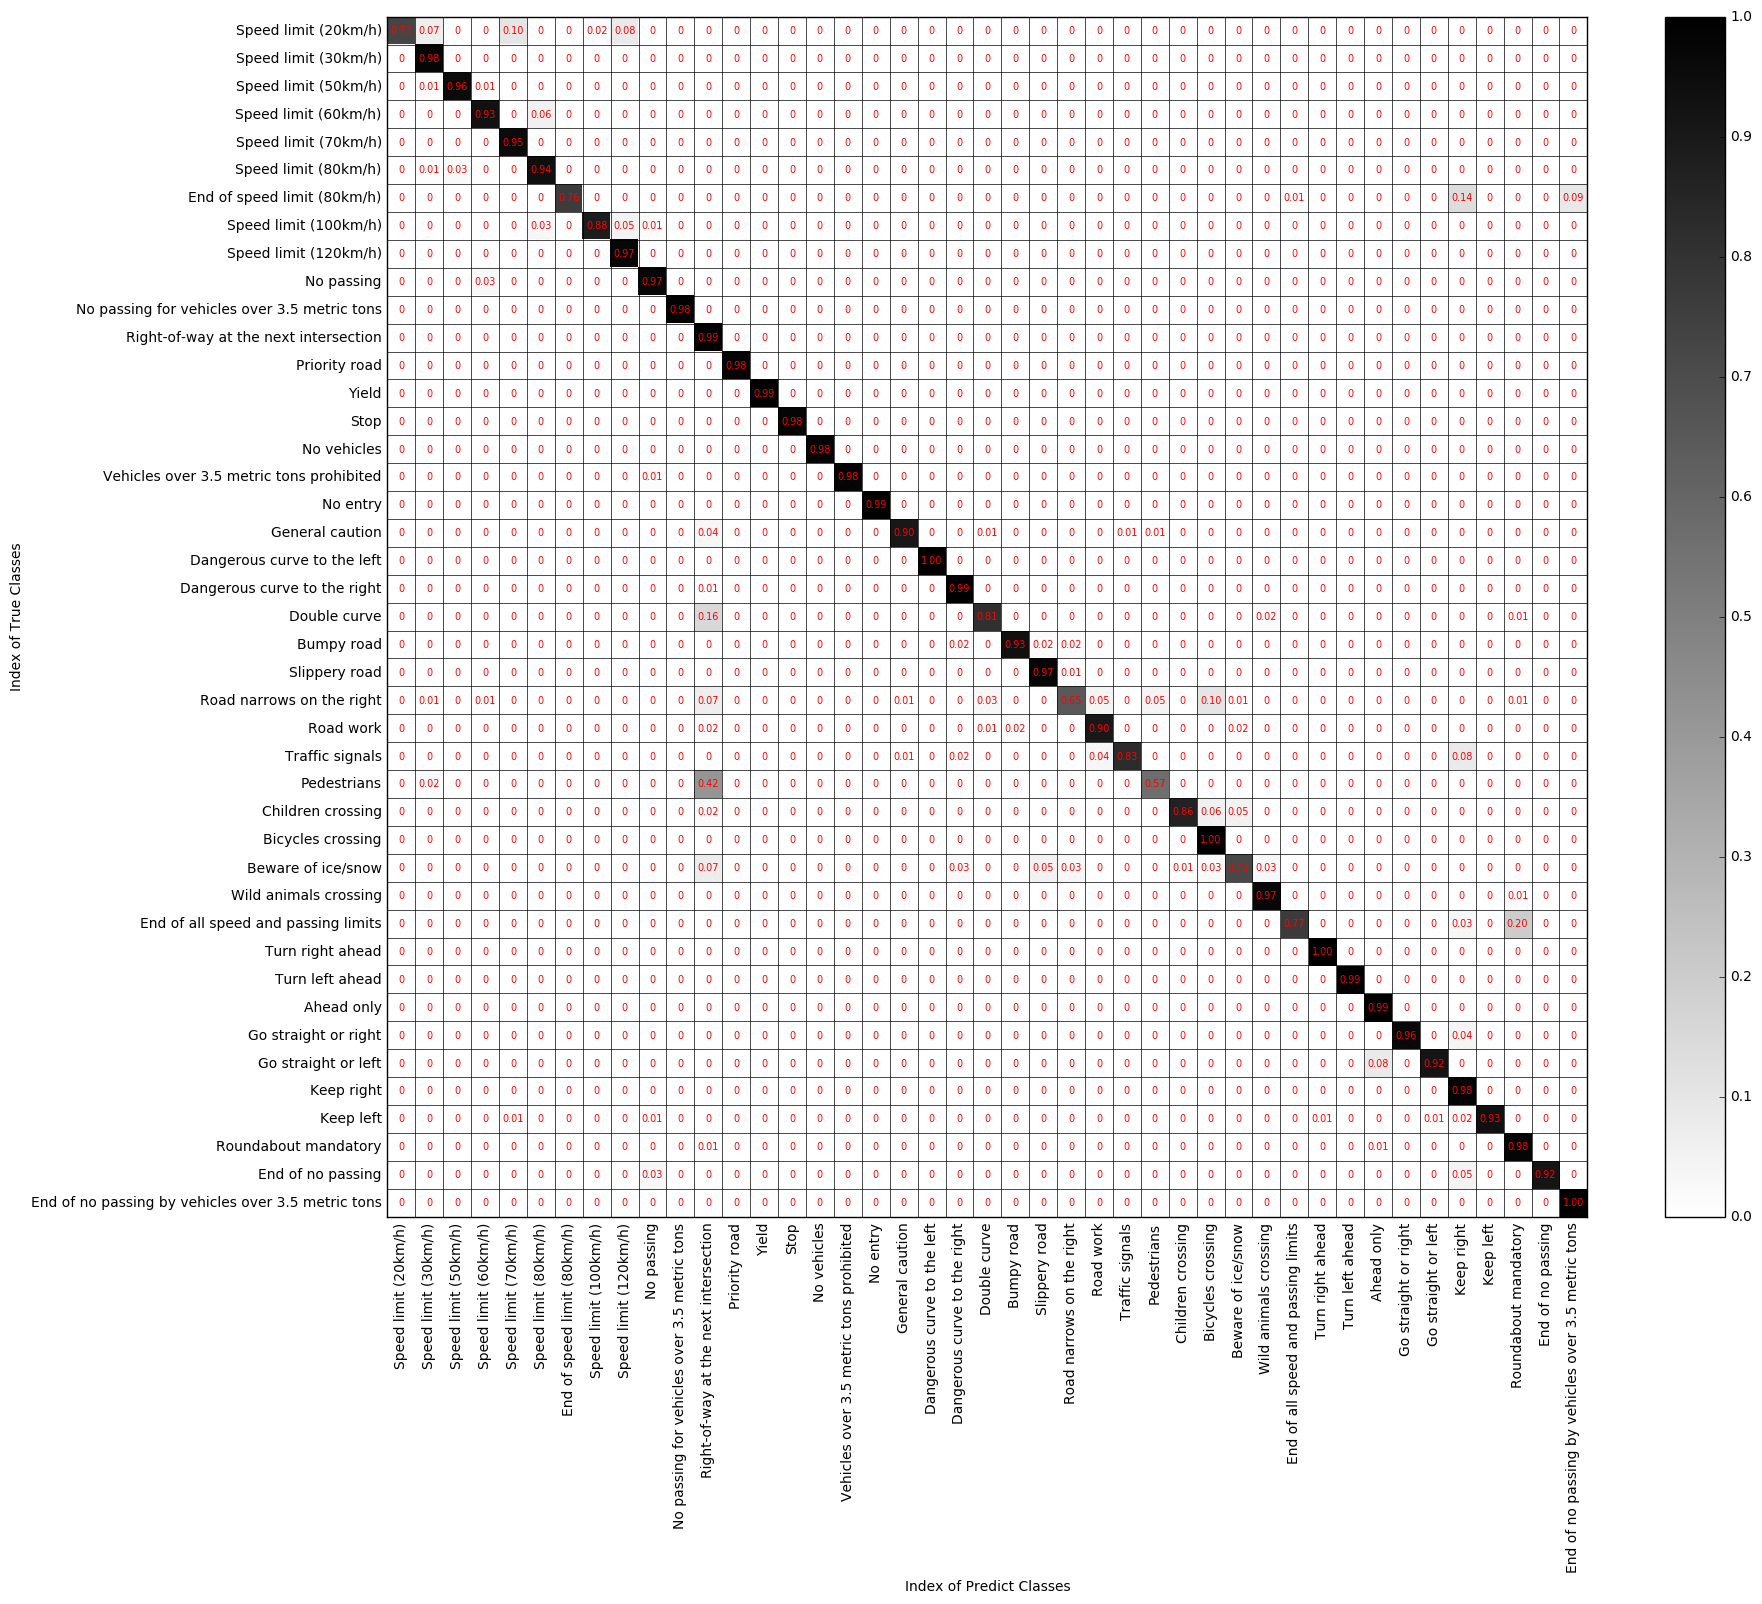

In [2]:
provider = original_data_provider
provider = normalise_image_whitening(provider)
lenet = Lenet(TrafficDataSets(provider),
              name="original_grayscale_data",
              epochs=80, batch_size=128, variable_mean=0, variable_stddev=0.1,
              learning_rate=0.001,
              drop_out_keep_prob=0.5)
lenet.train()
Image(filename=lenet.file_name) 
Image(filename=lenet.file_name_confusion_matrix)
print(lenet.file_name_wrong_predicts)
Image(filename=lenet.file_name_wrong_predicts)

# Please ignore error print below, it's come from the wrong prediction creation process

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I have choose AdamOptimizer as it calculate portion of the data so that faster than full gradient, it uses moving averages of the parameters, training faster and has less chance to trap into local best result.
epochs are based on batch size, learning rate, drop out rate, etc.
I normally watch the training accuracy and validation accuracy curves, while they cound't improve or start to go down hill, that will be the right size of epochs
Batch size controlls how much data you give to AdamOptimizer for it's moving average, if it's too small, the loss curve will looks wiggle, but if it's too high, will take too long for training.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
Lots of trial and error.
I think traffic sign has 43 classes and picture is more complex than hand written numbers. so that increase feature map (out put deepth) would help, also reduce max pooling stride size should help as well.
But from my testing, they didn't improve the accuracy too much.

I have draw myself training / valiation loss, training / validation accuracy curves, confus matrix, even printed out all images which model predicted wrong

From the confusion matrix, the class with less training data turned to have higher predict error, also from wrong prediction picture, I think model is not good on picture which is too dark or too bright, the data augment should focus on those two area, that's why I start to implement brightness/contrast but not finish yet.

**training / valiation loss, training / validation accuracy curves**
![Loss Accuracy Curves](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/raw/master/images/loss_accuracy_curves.png "Loss Accuracy Curves")

**Confusion Matrix** 
![Confusion Matrix](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/raw/master/images/confusion_matrix.png "Confusion Matrix")

**Wrong Predictions** 
![Wrong Predictions](https://github.com/JamesLuoau/Traffic-Sign-Recognition-with-Deep-Learning-CNN/raw/master/images/wrong_predictions.png "Wrong Predictions")


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

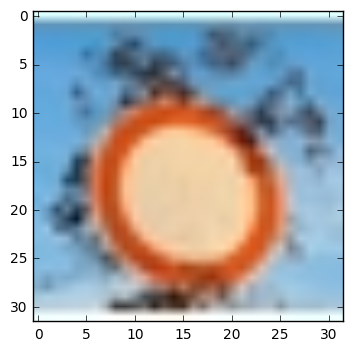

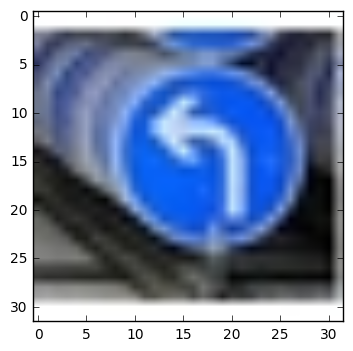

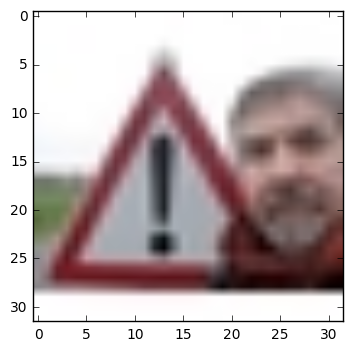

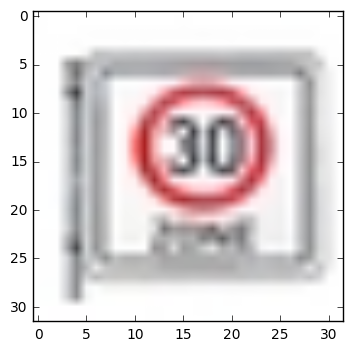

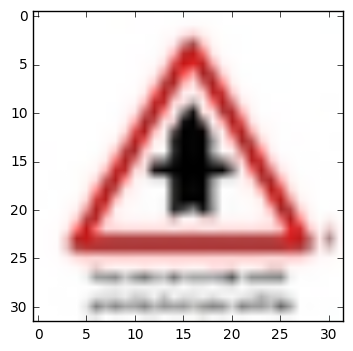

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgs = ['1.png', '2.png', '3.png', '4.png', '5.png']

new_input = []

for imgname in imgs:
    image = mpimg.imread('images/' + imgname)
    new_input.append(image)
    plt.imshow(image)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
Image1: it has lots of noise outside the sign, also it has a write backgroup, the network sames not able to handle this kind picture
Image2: CNN uses border / curves to classify pictures, this images has lots of border, would like to see if network able to handle it or not
Image3: Got a big face on it, it quite noisy to human eyes as we are so easy to focus to it, would like to see how computer deal with it
Image4: Quite normal, but has some word under number 30
Image5: From the wrong predict iamge, looks like model not able to handle the sign with a small symbol in it

In [10]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
predict_result = lenet.session.run(lenet.prediction_softmax, feed_dict={lenet.x: new_input, lenet.keep_prob: 1.0})

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [11]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
print(predict_result)


[[  1.58e-03   7.04e-03   1.89e-02   4.08e-03   7.05e-02   5.68e-02
    4.72e-05   2.87e-02   1.16e-01   1.14e-02   5.32e-03   6.62e-04
    2.10e-03   1.89e-03   3.26e-03   3.33e-01   1.07e-03   3.96e-04
    1.61e-02   1.41e-04   6.66e-03   3.22e-03   1.28e-01   1.93e-03
    4.00e-03   9.11e-02   3.97e-02   2.47e-04   2.35e-03   2.31e-02
    1.08e-02   2.40e-03   2.28e-04   2.89e-04   8.71e-04   1.46e-03
    6.14e-04   7.85e-04   2.54e-03   3.64e-04   7.60e-04   4.93e-05
    1.56e-04]
 [  1.09e-04   2.50e-04   5.59e-04   8.69e-03   1.06e-03   3.57e-04
    2.98e-04   1.99e-04   1.67e-01   9.51e-03   4.46e-05   3.10e-04
    5.76e-04   6.66e-04   1.02e-04   3.51e-04   4.14e-04   1.77e-03
    1.45e-04   5.58e-04   3.54e-03   2.90e-05   2.18e-06   1.98e-03
    5.84e-05   8.63e-05   1.61e-04   4.17e-05   1.44e-03   1.70e-05
    9.38e-05   2.89e-05   1.03e-02   1.91e-03   1.18e-01   7.04e-02
    1.30e-01   2.20e-01   1.14e-01   1.02e-03   1.31e-01   2.75e-03
    1.01e-05]
 [  4.68e-03   1.12e

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [9]:
print(print(lenet.session.run(tf.nn.top_k(lenet.prediction_softmax, 2), feed_dict={lenet.x: new_input, lenet.keep_prob: 1.0})))

TopKV2(values=array([[ 0.33,  0.13],
       [ 0.22,  0.17],
       [ 0.8 ,  0.09],
       [ 0.75,  0.07],
       [ 0.99,  0.01]], dtype=float32), indices=array([[15, 22],
       [37,  8],
       [18,  4],
       [ 3,  2],
       [18, 27]], dtype=int32))
None


**Answer:**
1. Image 1, Labelled as 15, predicted as 15 but with only 33% confidence
2. Image 2, Labelled as 34(trun left ahead), predicted as 37(go streight or trun left) with 80% confidence
3. Image 3, Labelled as 18 predicted as 18
4. Image 4, Labelled as 1, predict as 3 with 75% confidence, wrong as it's 30 speed limit but model think it's 60 speed limit
5. Image 5, Labelled as 11(Right-of-way at the next intersection), predicted as 18(General caution)

only 2 out of 5 has been succesfully predicted, which shows the model has generalization issue. Increase training size (augment), drop out in the wrong layer, more regulazation could help 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.